Step 1. 인물모드 직접 해 보기

- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?


Step 2. 사진에서 문제점 찾기

- 추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

Step 3. 해결 방법을 제안해 보기

In [2]:
from importlib.metadata import version
import cv2
import pixellib
from pixellib.semantic import semantic_segmentation

import os
import urllib
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# model_file = './deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model_file = '../m3_exploration_09/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
img_path = './img_0.jpg'

In [8]:
def get_shallow_focus(img_path=img_path):
    img_orig = cv2.imread(img_path)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    #컬러맵 만들기 
#     colormap = np.zeros((256, 3), dtype = int)
#     ind = np.arange(256, dtype=int)

#     for shift in reversed(range(8)):
#         for channel in range(3):
#             colormap[:, channel] |= ((ind >> channel) & 1) << shift
#         ind >>= 3
    
    #seg_color = (128,128,192)
    seg_color = (0,0,0)
    seg_map = np.all(output==seg_color, axis=-1)
    
    img_mask = seg_map.astype(np.uint8) * 255
    img_orig_blur = cv2.blur(img_orig, (20,20))
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    img_thre = np.where(img_mask_color<10, img_orig, 0)
    img_concat = np.where(img_mask_color<10, img_orig, img_orig_blur)
    
    img_list = [cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB), 
                output, seg_map, img_mask, # 0, 1, 2, 3
                cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB), # 4
                img_mask_color, # 5
                img_bg_mask, img_bg_blur,  # 6, 7
                cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB),  # 8
                cv2.cvtColor(img_thre, cv2.COLOR_BGR2RGB), # 9
                cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)]  # 10
    
    return img_list

In [9]:
def show_image(img_path):
    img = get_shallow_focus(img_path)
    plt.figure(figsize=(8,8))
    plt.subplot(2, 2, 1)
    plt.imshow(img[0])
    plt.subplot(2, 2, 2)
    plt.imshow(img[5])
    plt.subplot(2, 2, 3)
    plt.imshow(img[10])
    plt.show()
    return img

1/1 [==============================] - 3s 3s/step


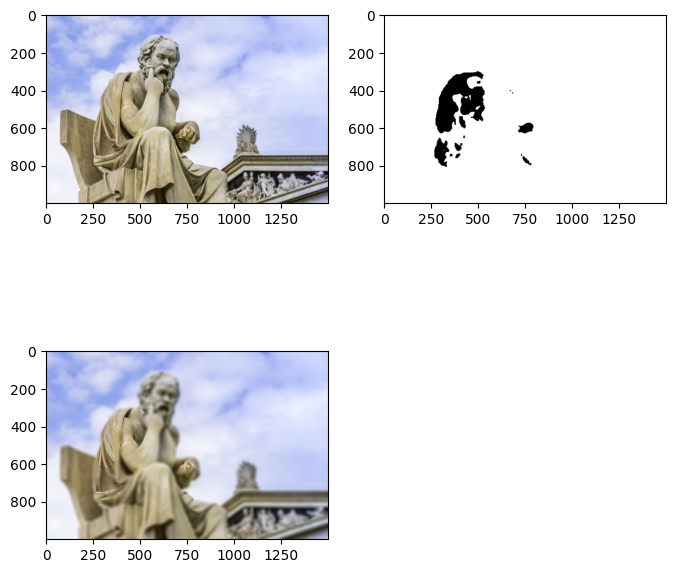

In [10]:
img_0 = show_image('./img_0.jpg')

> 오른 어깨 아주 일부분만 됨. 왜지...?

1/1 [==============================] - 1s 1s/step


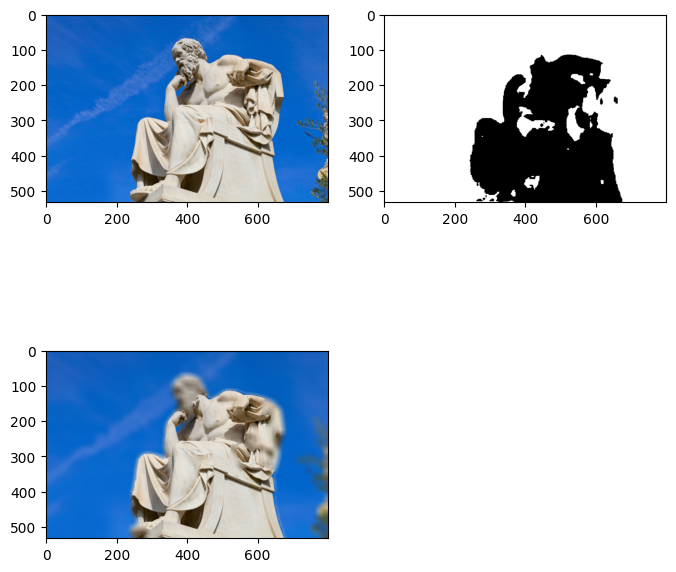

In [11]:
img_1 = show_image('./img_1.jpg')

> 얼굴부분과 왼팔쪽의 복잡한 텍스쳐는 잘 안됨

1/1 [==============================] - 1s 1s/step


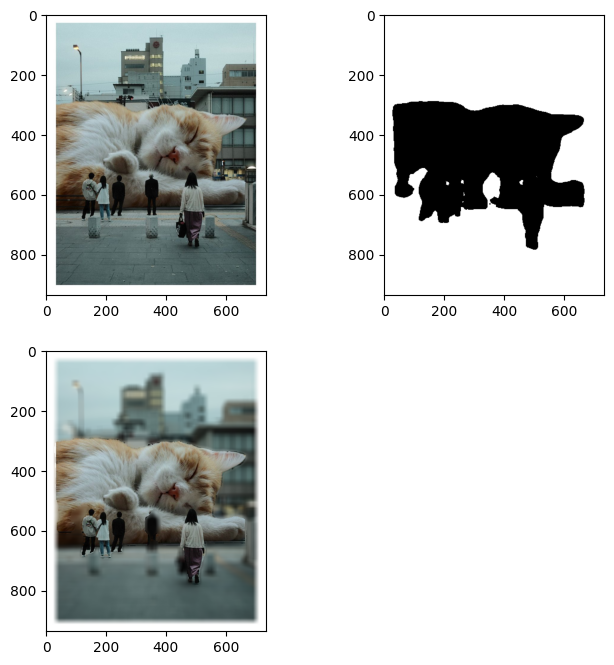

In [22]:
img_2 = show_image('./img_2.jpg')

> 큰 고양이는 잘 되었고, 사람들은 일부 덜 되었음.  
> 역시나 사람은 되고, 같은 거리의 길바닥은 흐려서 어색함

1/1 [==============================] - 2s 2s/step


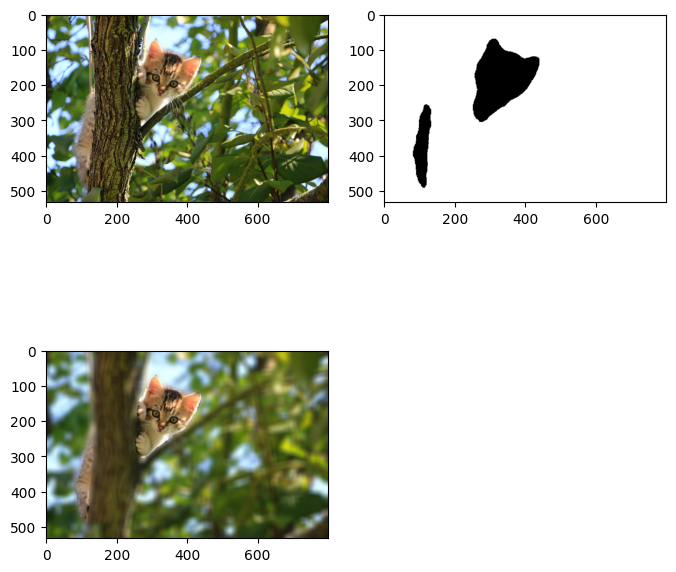

In [13]:
img_3 = show_image('./img_3.jpg')

> 나무에 가려진 고양이 몸까지 인식을 잘 하긴 했지만, 나무는 제외되어 어색함

1/1 [==============================] - 1s 1s/step


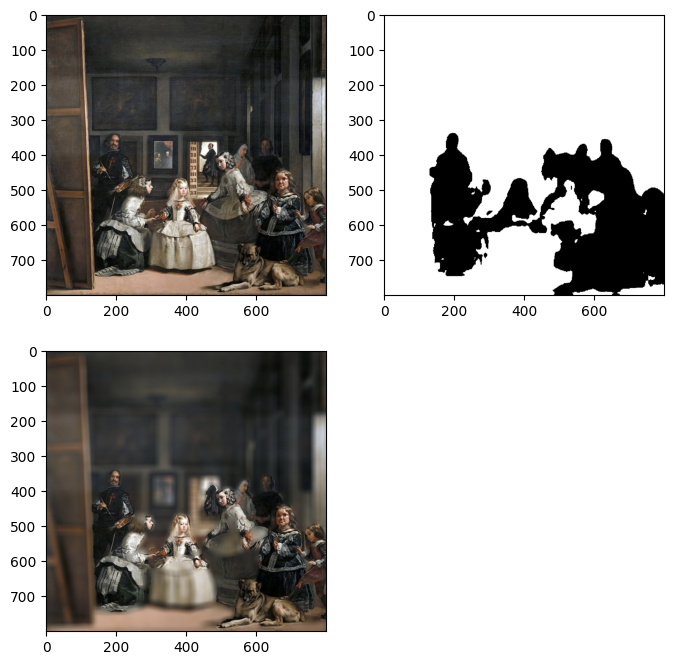

In [14]:
img_10 = show_image('./img_10.jpg')

> 그림도 인식해서 포커싱이 되긴 했는데,  
> 개는 잘 되었지만,  
> 일부 사람들의 몸 일부분만 인식하였음

1/1 [==============================] - 1s 1s/step


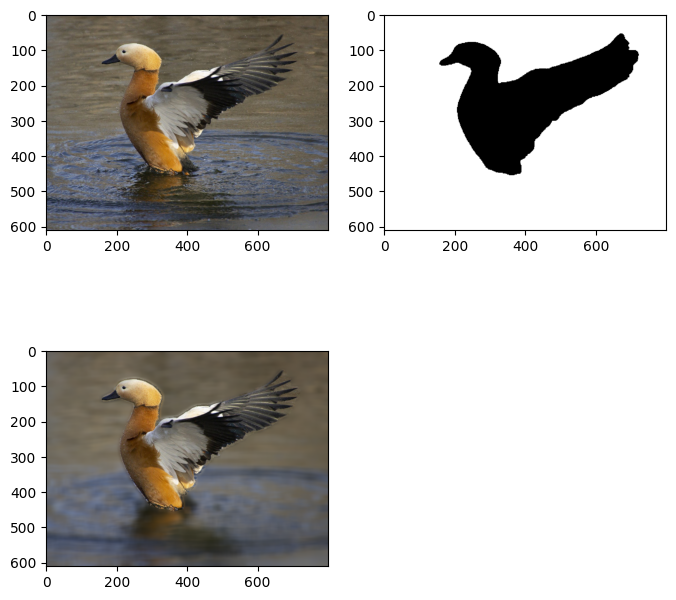

In [15]:
img_5 = show_image('./img_5.jpg')

1/1 [==============================] - 2s 2s/step


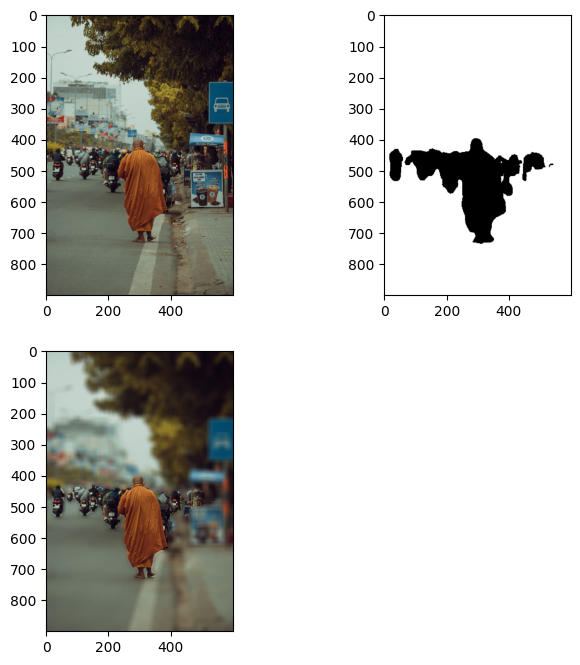

In [17]:
img_6 = show_image('./img_6.jpg')

> 거리와 별개로 사람들만 포커싱됨

1/1 [==============================] - 2s 2s/step


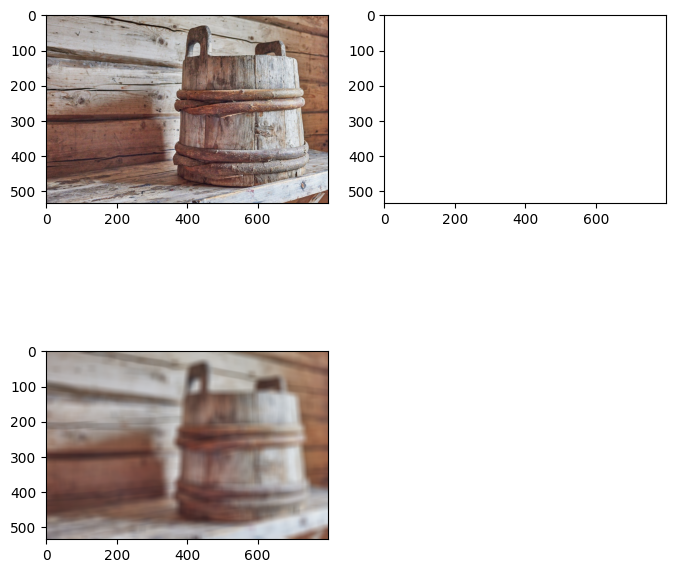

In [18]:
img_7 = show_image('./img_7.jpg')

1/1 [==============================] - 2s 2s/step


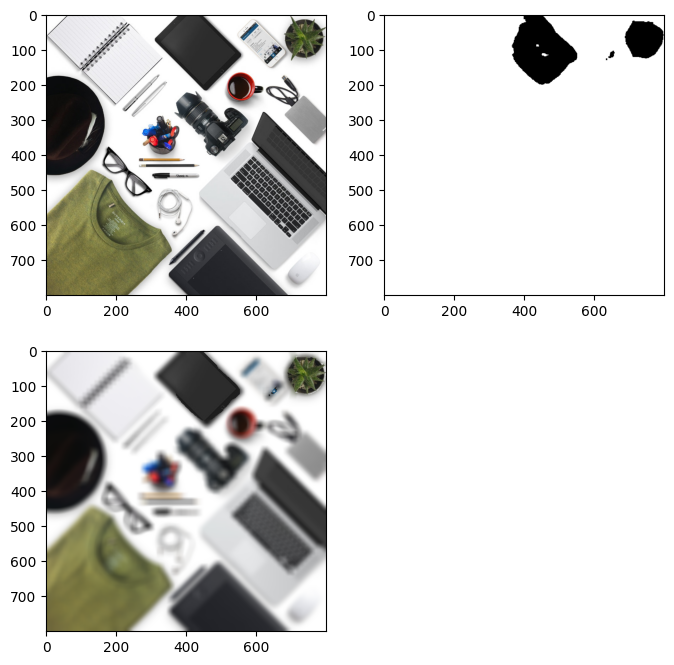

In [19]:
img_8 = show_image('./img_8.jpg')

1/1 [==============================] - 2s 2s/step


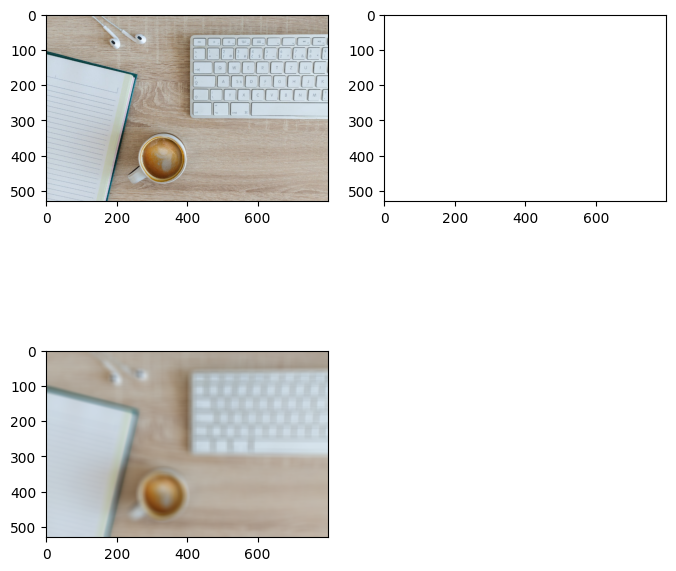

In [20]:
img_9 = show_image('./img_9.jpg')

# 문제점 

- 사람, 동물만 인식을 하다보니, 이것으로 shallow focus 이미지를 만들기는 어려움.
  - 같은 거리선상에 있는지 알 수 있어야 함
- 사물은 인식 못함